<a href="https://colab.research.google.com/github/tanuj-kalra/clustering_project/blob/main/Lithion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [ ]:
!wget -O "driver-data.csv" "https://raw.githubusercontent.com/tanuj-kalra/clustering_project/main/driver-data.csv"

--2021-01-08 16:05:38--  https://raw.githubusercontent.com/tanuj-kalra/clustering_project/main/driver-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81377 (79K) [text/plain]
Saving to: ‘driver-data.csv’

driver-data.csv     100%[===================>]  79.47K  --.-KB/s    in 0.01s   

2021-01-08 16:05:38 (5.43 MB/s) - ‘driver-data.csv’ saved [81377/81377]



# Reading the dataset

In [ ]:
data = pd.read_csv("driver-data.csv",index_col = "id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


# Dataset Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3423311935 to 3423311533
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   mean_dist_day         4000 non-null   float64
 1   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 93.8 KB


# Dataset Description

In [ ]:
data.corr()

,mean_dist_day,mean_over_speed_perc
mean_dist_day,1.000000,0.266897
mean_over_speed_perc,0.266897,1.000000


In [ ]:
print(data.describe())

       mean_dist_day  mean_over_speed_perc
count    4000.000000           4000.000000
mean       76.041523             10.721000
std        53.469563             13.708543
min        15.520000              0.000000
25%        45.247500              4.000000
50%        53.330000              6.000000
75%        65.632500              9.000000
max       244.790000            100.000000


# Using K-Means Algorithm for Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)

In [ ]:
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_

array([[ 49.99263253,   5.20447169],
       [180.34311782,  10.52011494],
       [177.83509615,  70.28846154],
       [ 50.40482436,  32.36533958]])

In [ ]:
kmeans.labels_

array([3, 3, 3, ..., 1, 1, 1])

In [ ]:
unique,counts = np.unique(kmeans.labels_,return_counts=True)
unique

array([0, 1, 2, 3])

In [ ]:
dict_data = dict(zip(unique,counts))

In [ ]:
dict_data

{0: 2773, 1: 696, 2: 104, 3: 427}

In [ ]:
data["Assigned Cluster"] = kmeans.labels_

# Plot of various classified clusters

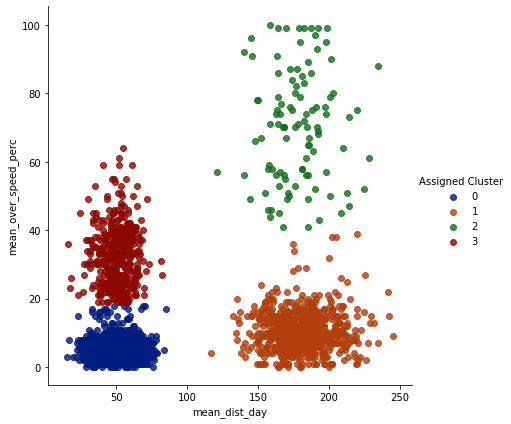

In [ ]:
sns.lmplot('mean_dist_day','mean_over_speed_perc',data = data,hue='Assigned Cluster',palette='dark',size=6,aspect=1,fit_reg = False)

In [ ]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

719601.1096991899

In [ ]:
kmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

# Converted Dataset with Assigned Clusters

In [ ]:

data

,mean_dist_day,mean_over_speed_perc,Assigned Cluster
id,,,
3423311935,71.24,28,3
3423313212,52.53,25,3
3423313724,64.54,27,3
3423311373,55.69,22,3
3423310999,54.58,25,3
...,...,...,...
3423310685,160.04,10,1
3423312600,176.17,5,1
3423312921,170.91,12,1
